In [5]:
import numpy as np
import pandas as pd
import matplotlib as ml
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ml.style.use('ggplot')

In [2]:
data=pd.read_csv("Salary_Data.csv")
data.tail(5)

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [3]:
data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


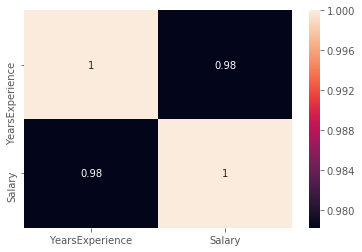

In [8]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [10]:
#feature

X=data.iloc[:,0:1].values
X.shape

(30, 1)

In [11]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [12]:
#target

y=data.iloc[:,1].values
y.shape

(30,)

In [13]:
#separating data into 2 parts

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [16]:
X_train.shape

(24, 1)

## From scratch

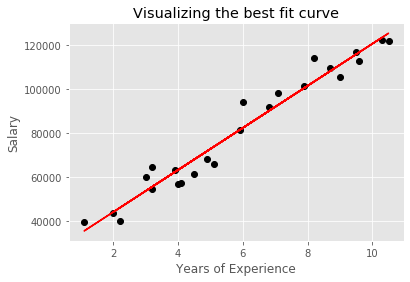

In [17]:
def best_fit(X, Y):
    X = list(X)
    Y = list(Y)
    xbar = sum(X)/len(X)    # Mean of x
    ybar = sum(Y)/len(Y)    # Mean of y
    n = len(X) # or len(Y)
    
    # Calculate numerator and denominator terms 
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    
    # Calculate theta0 and theta1
    theta1 = numer / denum
    theta0 = ybar - theta1 * xbar

    return theta0,theta1

t0,t1 = best_fit(X_train,y_train)
plt.plot(X_train,y_train,"o",color="black")   # Actual output

yfit = [t0 + t1*xi for xi in X_train]
plt.plot(X_train,yfit,color="red")      # Best fit curve/hypothesis function

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Visualizing the best fit curve")
plt.show()

## Using scikit-learn

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor=LinearRegression()

In [28]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
X_test

array([[1.5],
       [5.3],
       [1.3],
       [3.7],
       [4. ],
       [2.9]])

In [21]:
y_test

array([37731., 83088., 46205., 57189., 55794., 56642.])

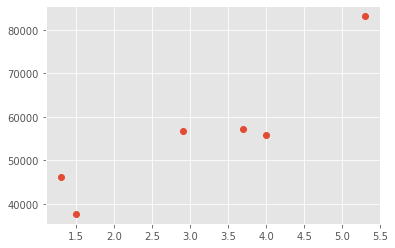

In [23]:
plt.plot(X_test,y_test,"o")
plt.show()

In [24]:
regressor.predict(X_test[0].reshape(1,1))

array([39296.22202233])

In [25]:
def sal_pred(year):
    test=np.array([year])
    sal=int(regressor.predict(test[0].reshape(1,1)))
   
    return sal

# Test
sal_pred(3)

53627

In [29]:
y_pred = regressor.predict(X_test)

In [32]:
r2_score(y_test,y_pred)

0.8143022783109007